In [2]:
from agent import build_and_save_functions

build_and_save_functions()

In [3]:
from dotenv import load_dotenv,find_dotenv
import openai
import os
load_dotenv(find_dotenv(),override=True)
openai.api_key = os.environ['OPENAI_API_KEY']

In [4]:
from agent import build_graph

router_names_graph,router_names = build_graph()

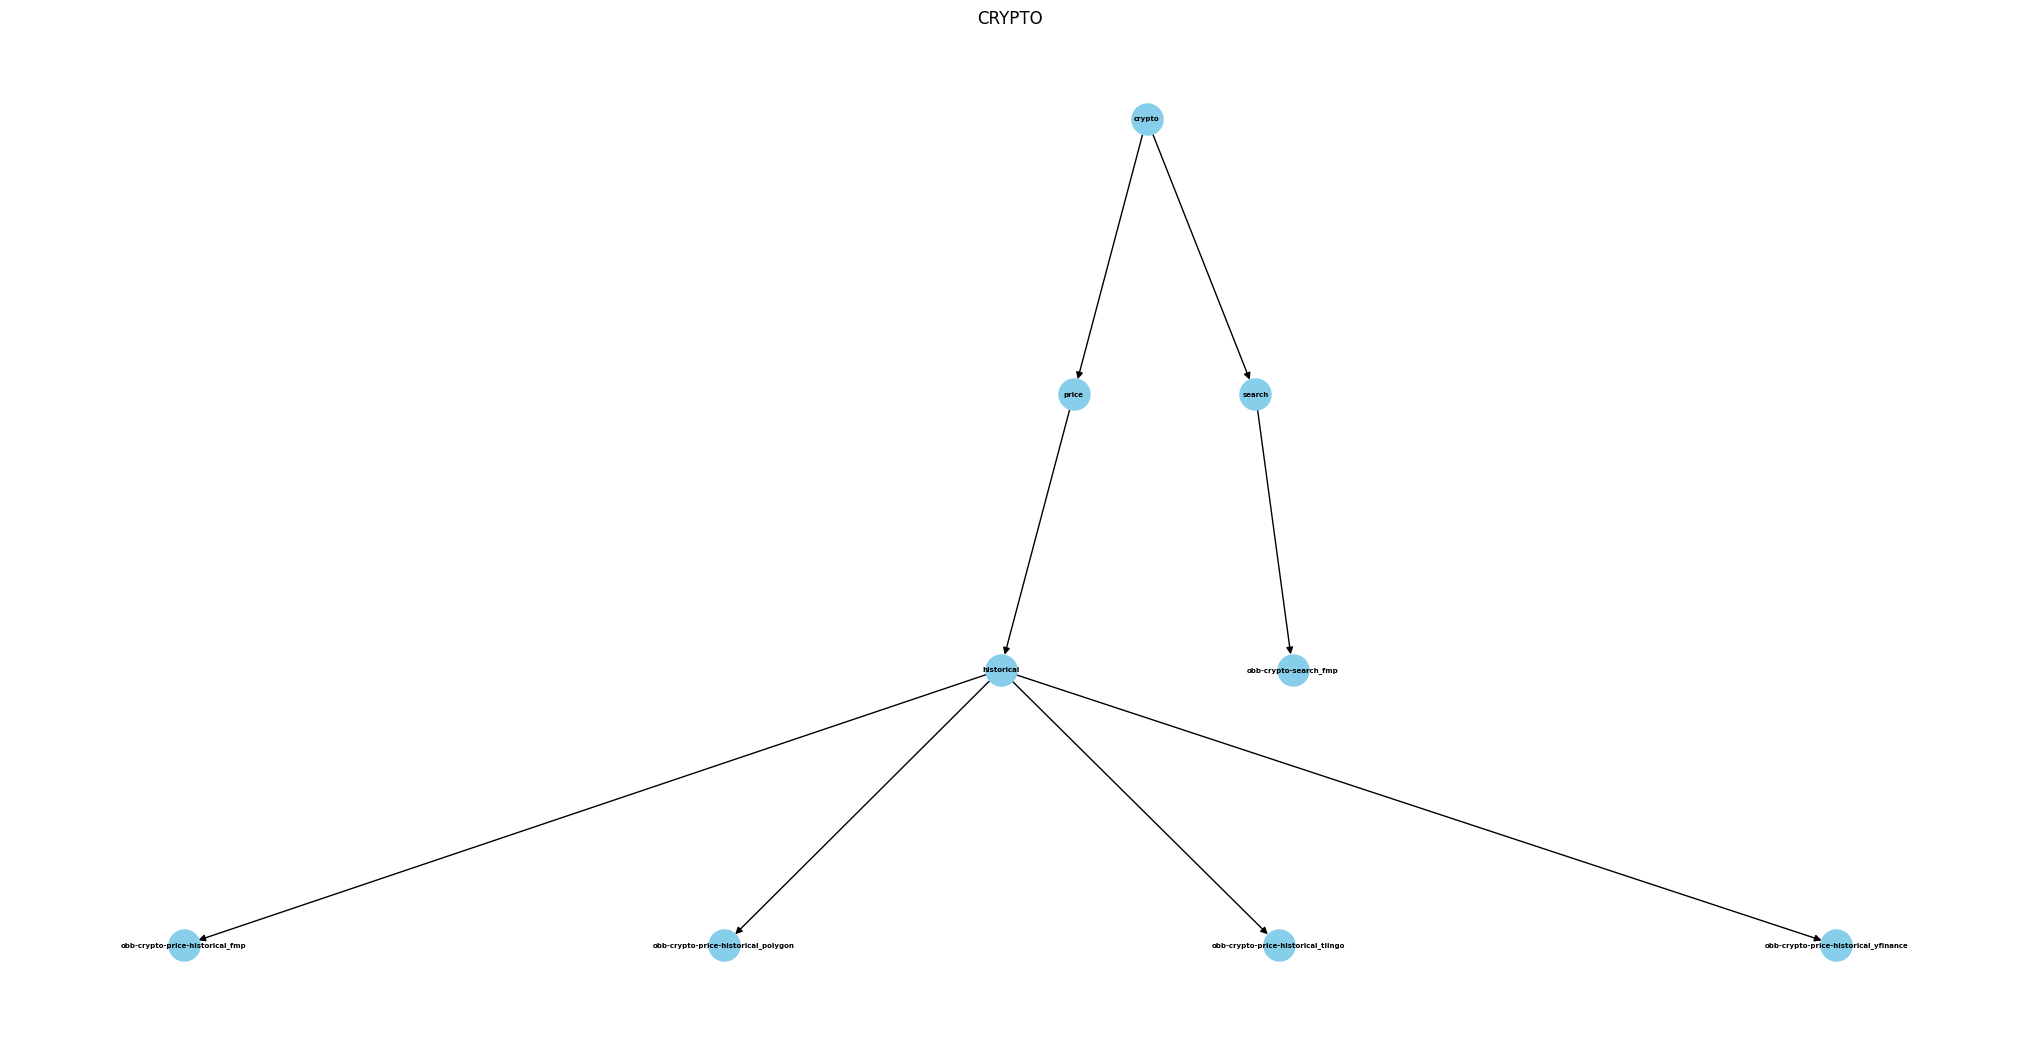

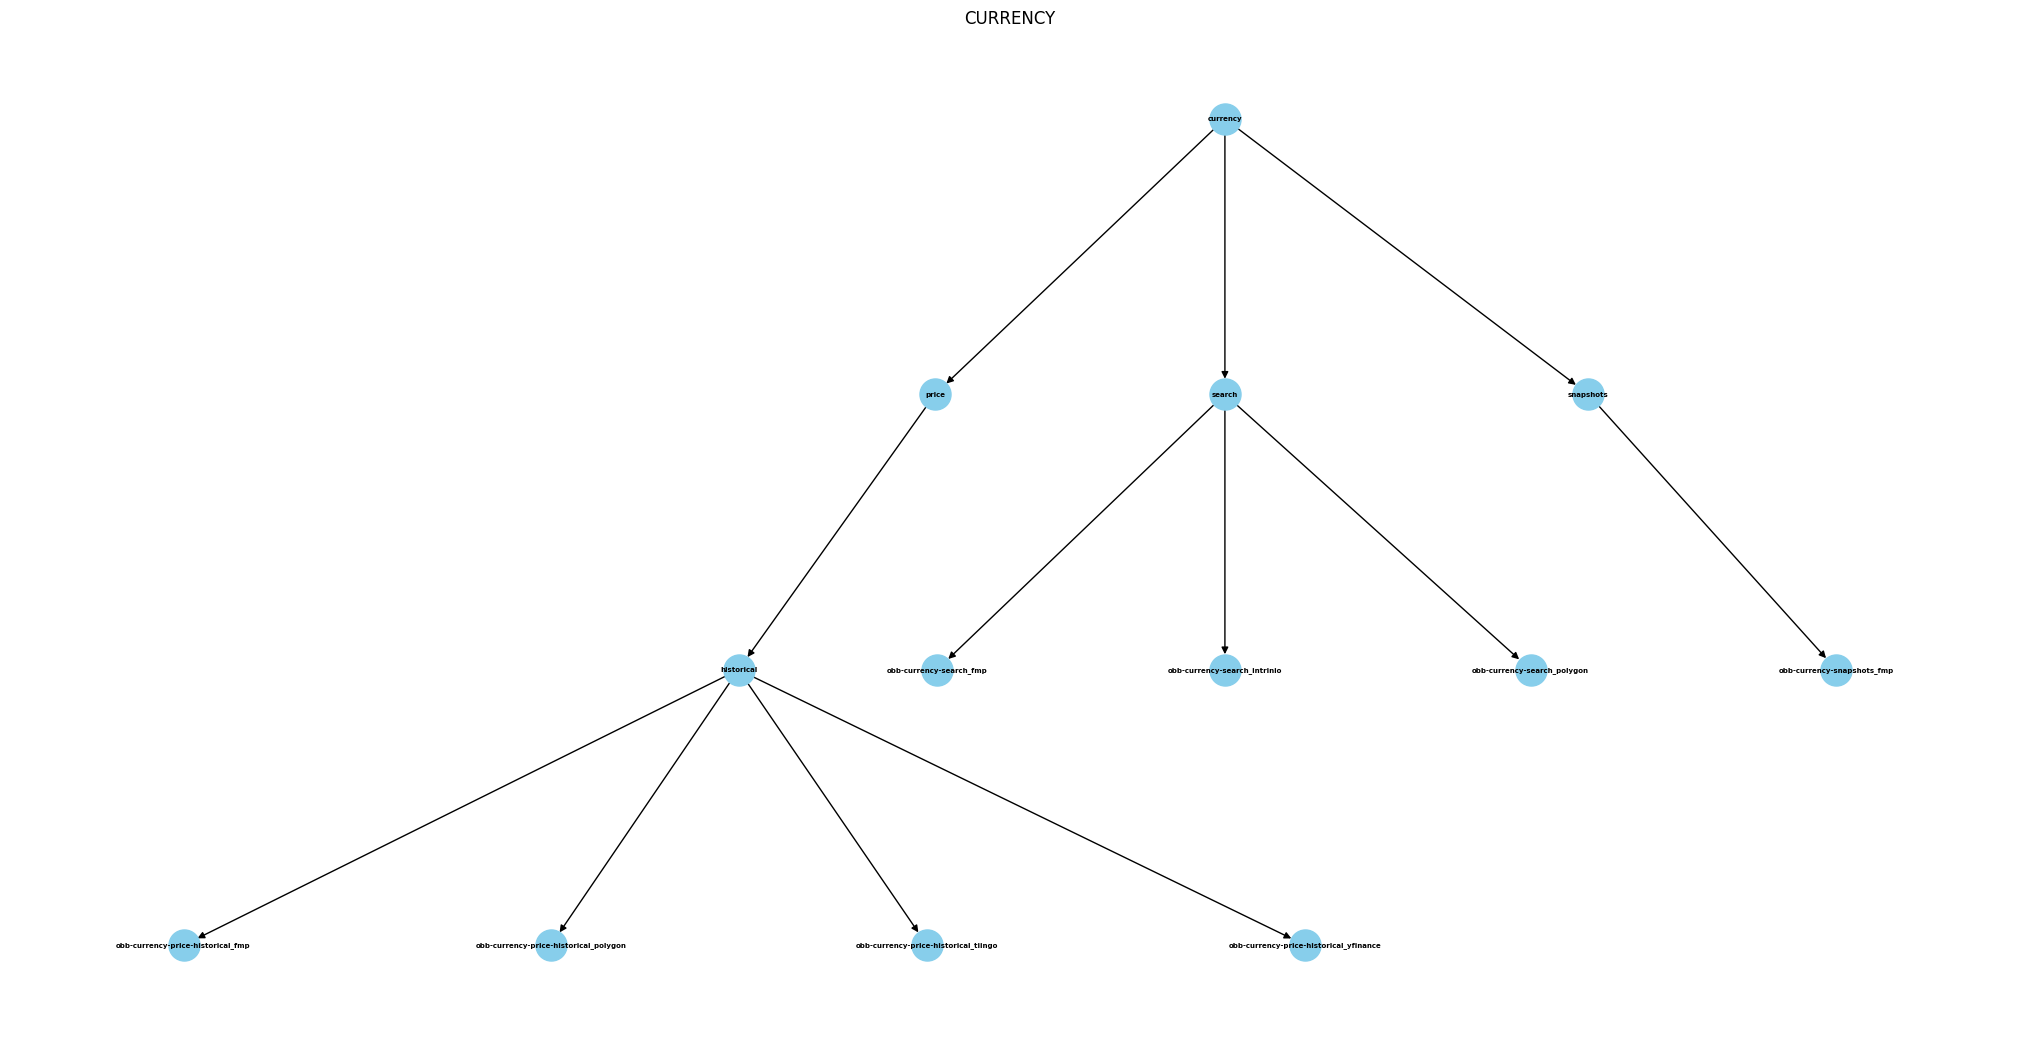

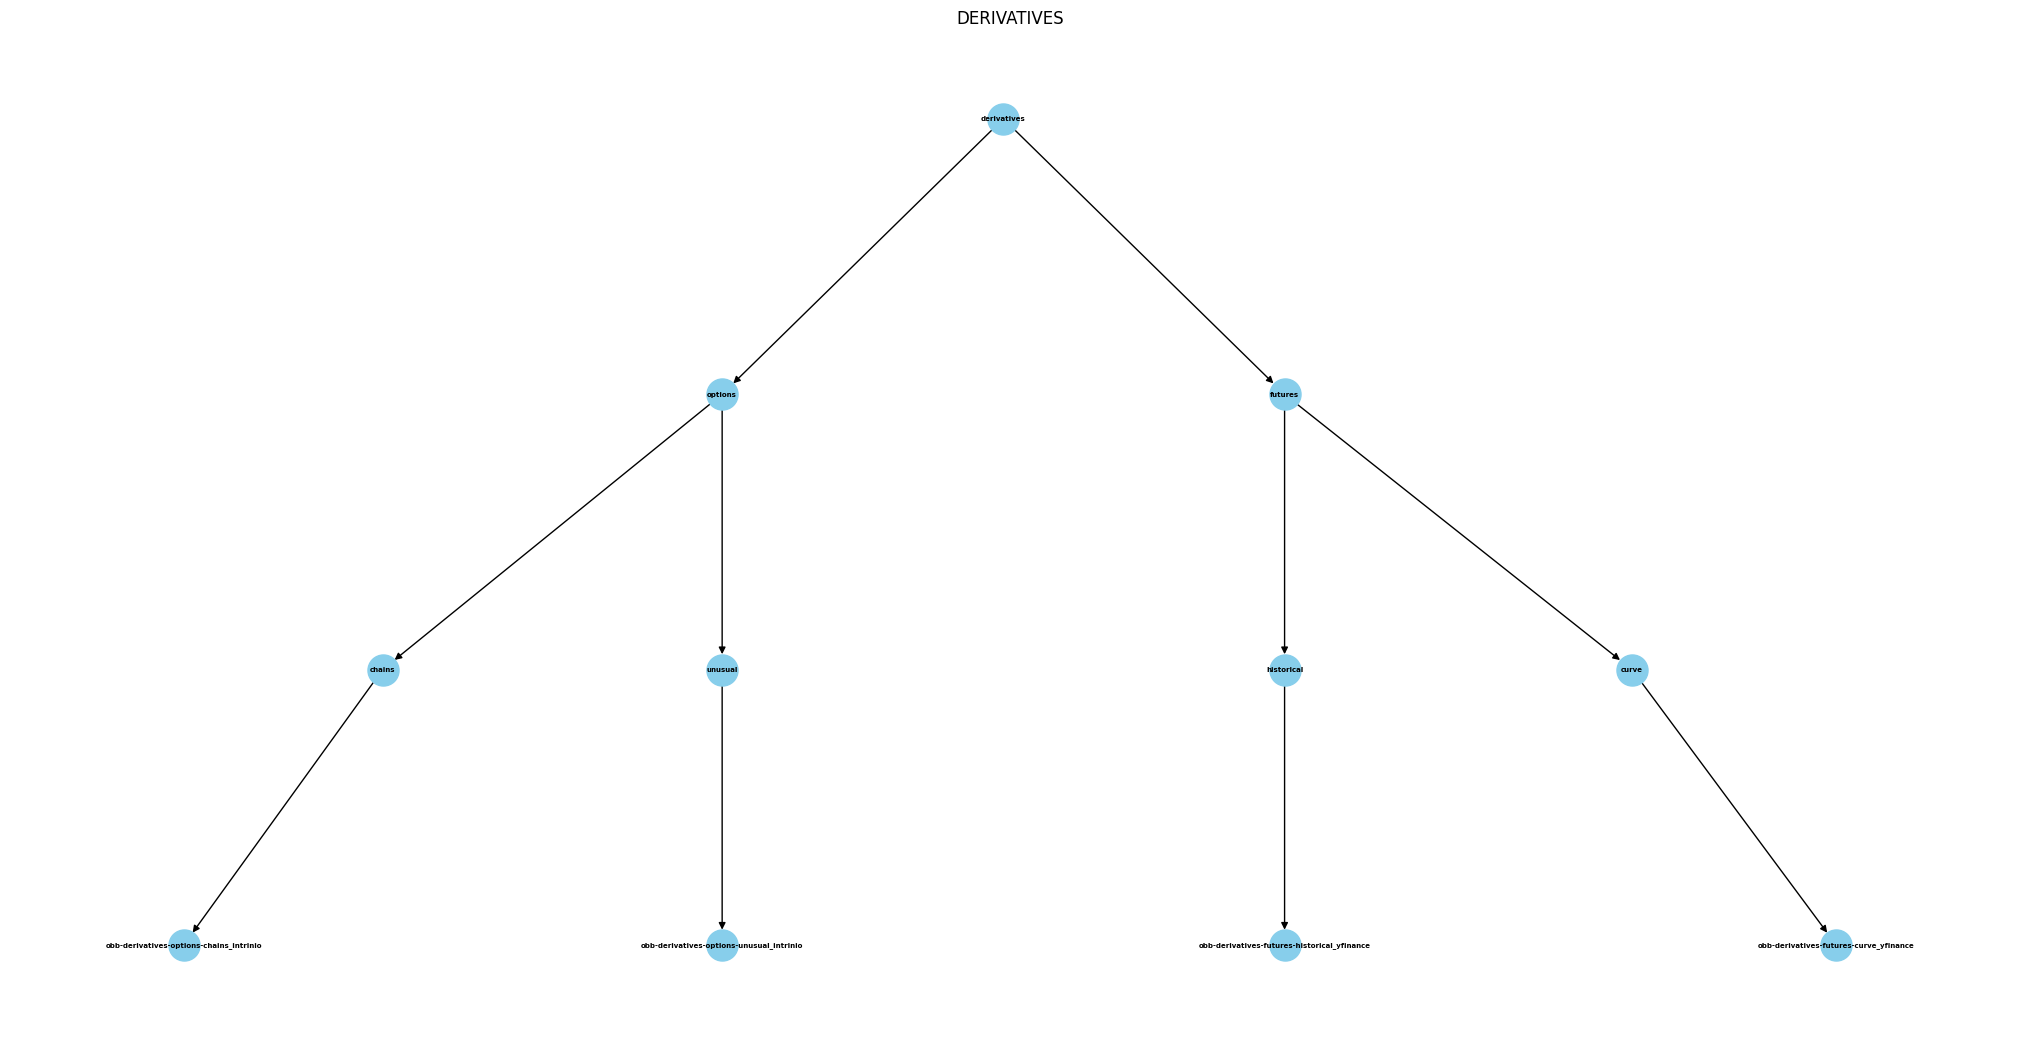

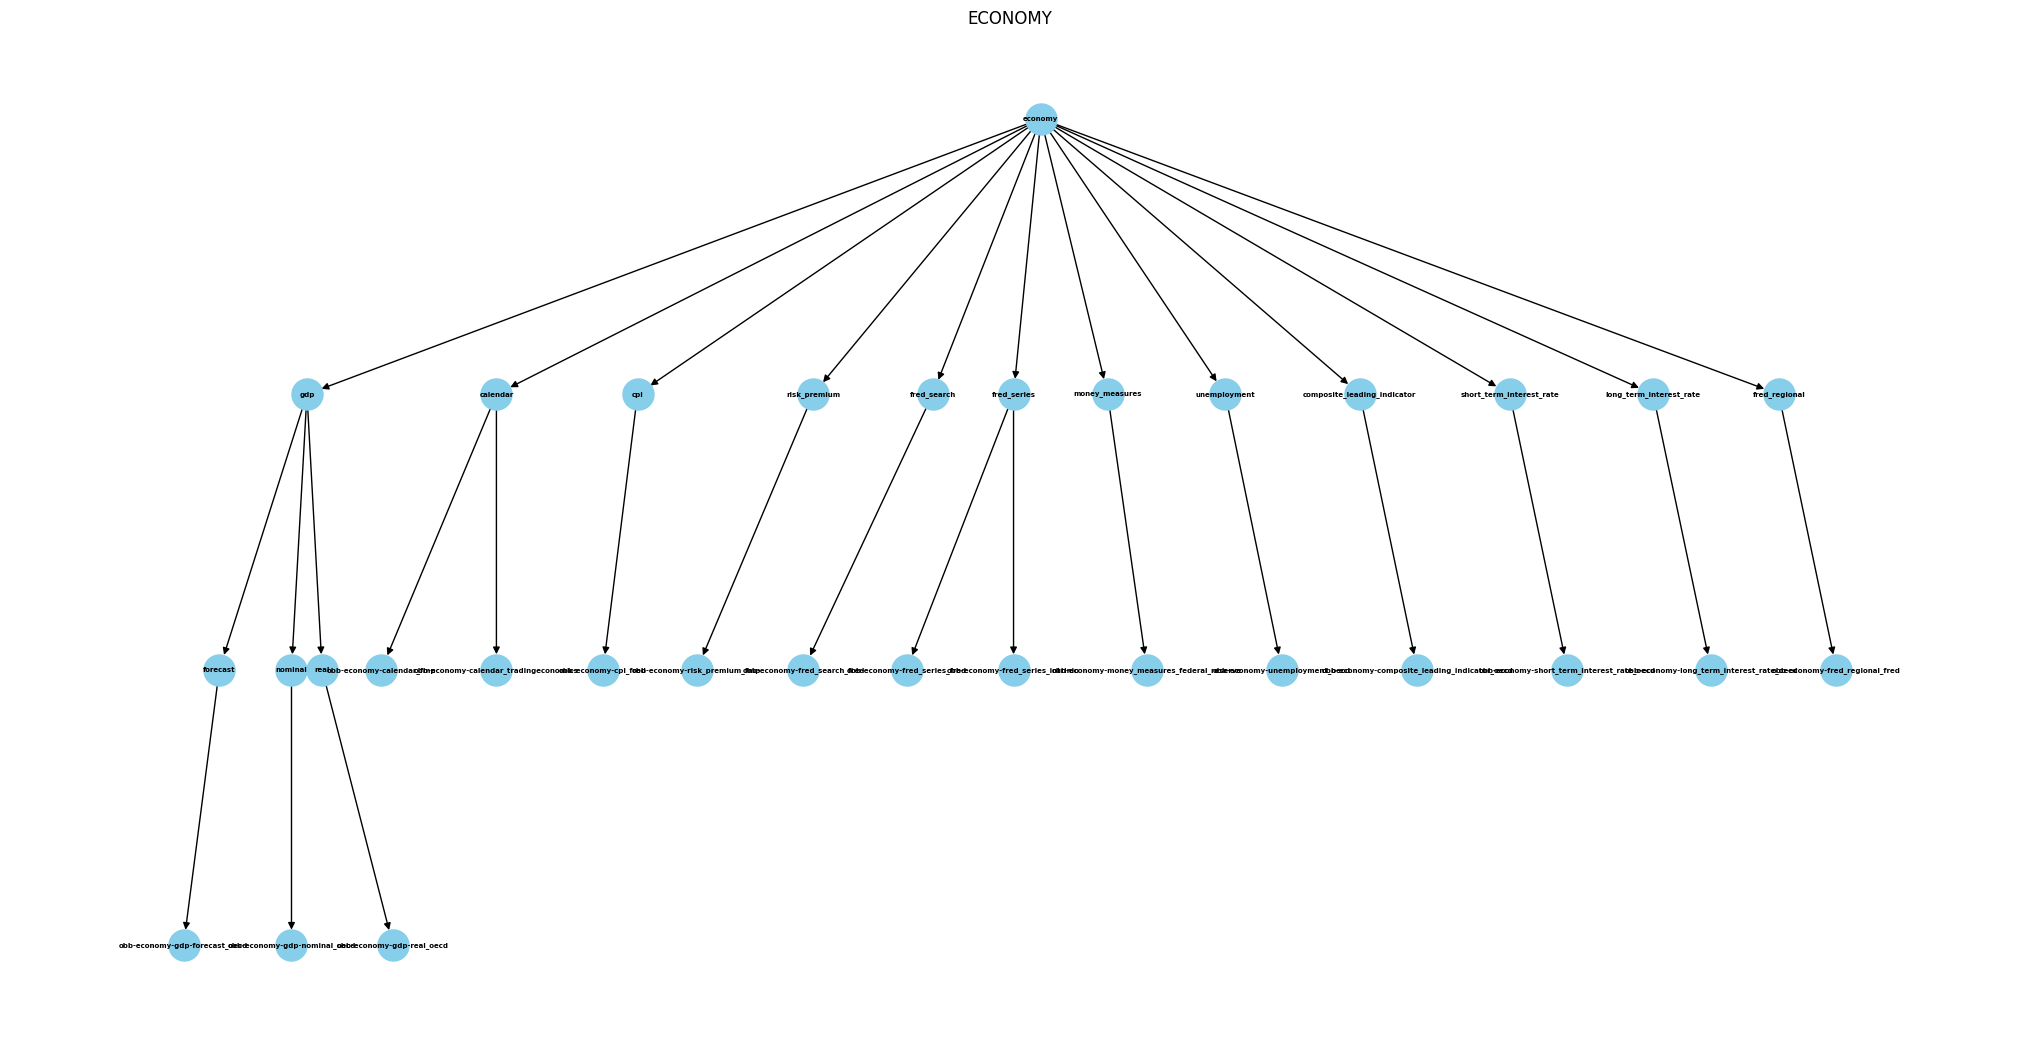

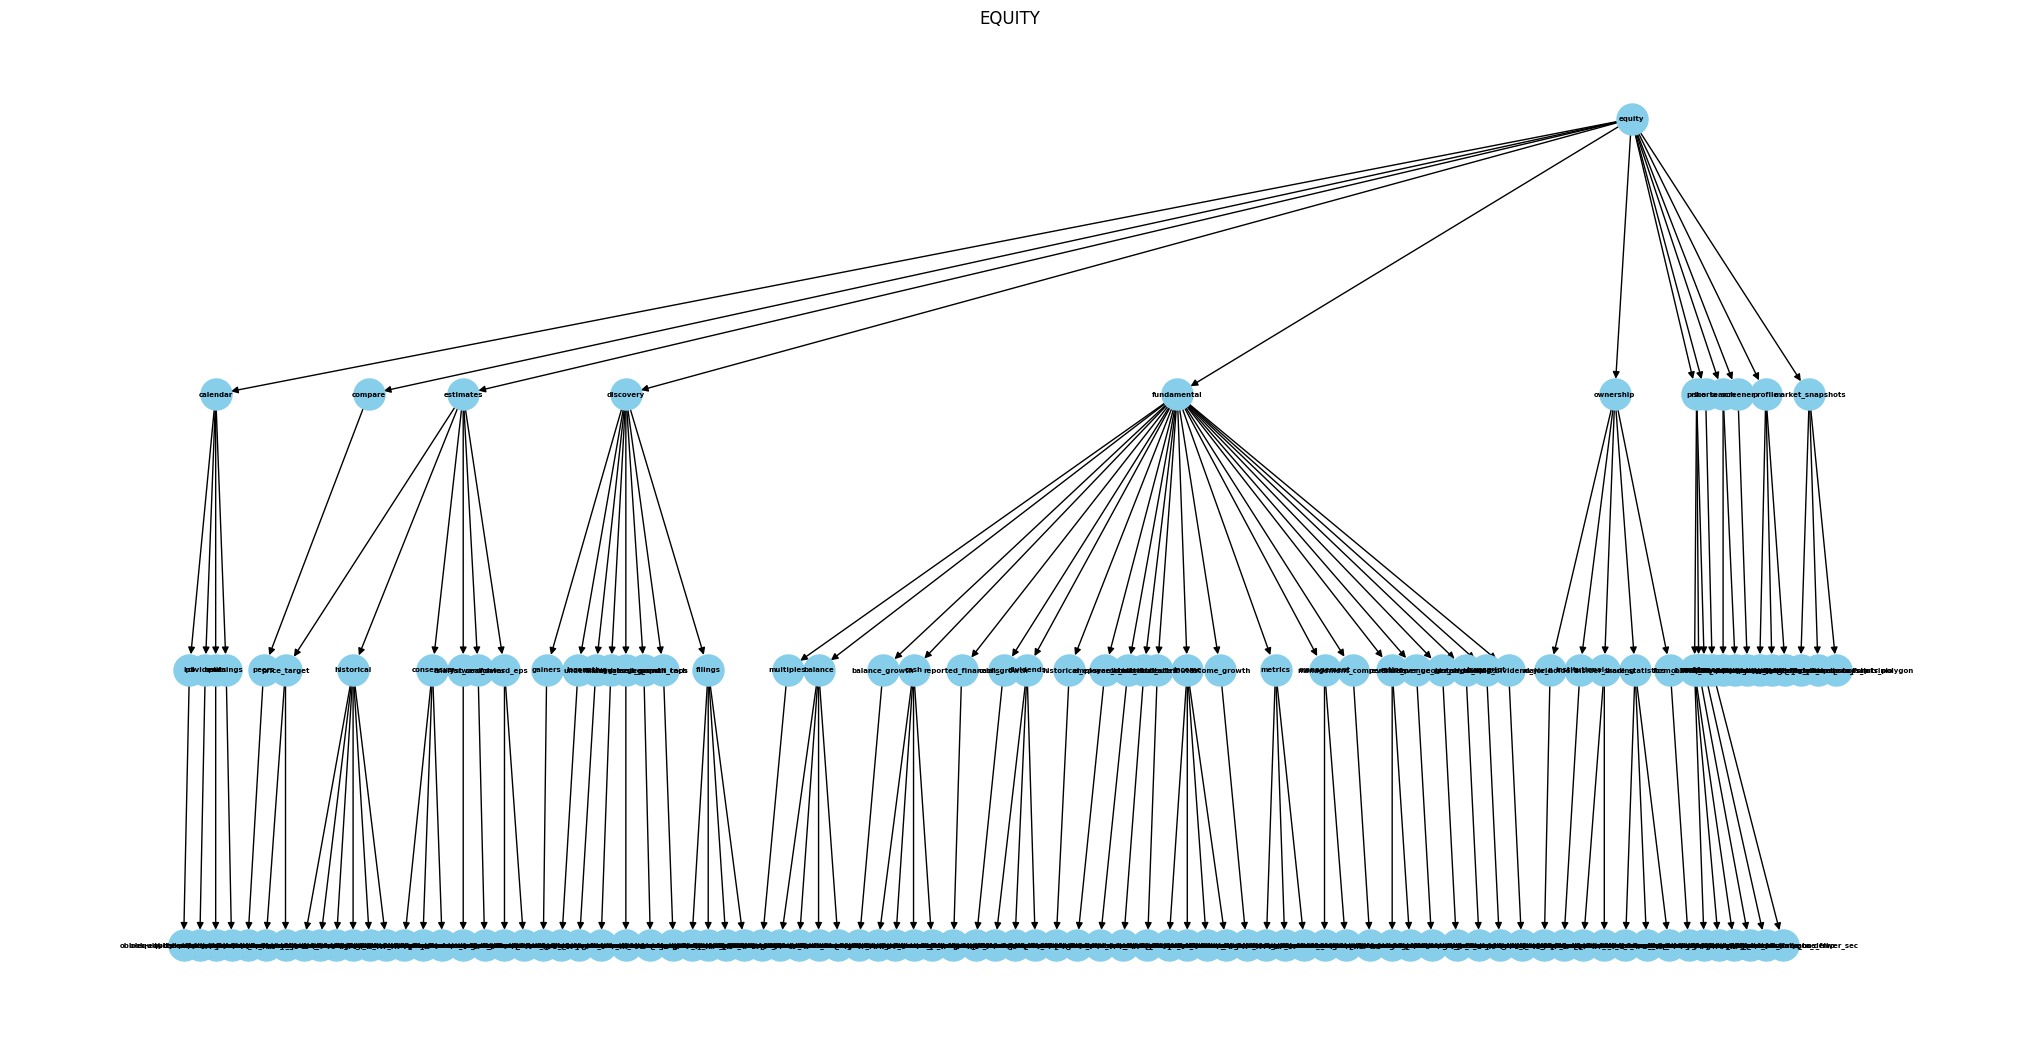

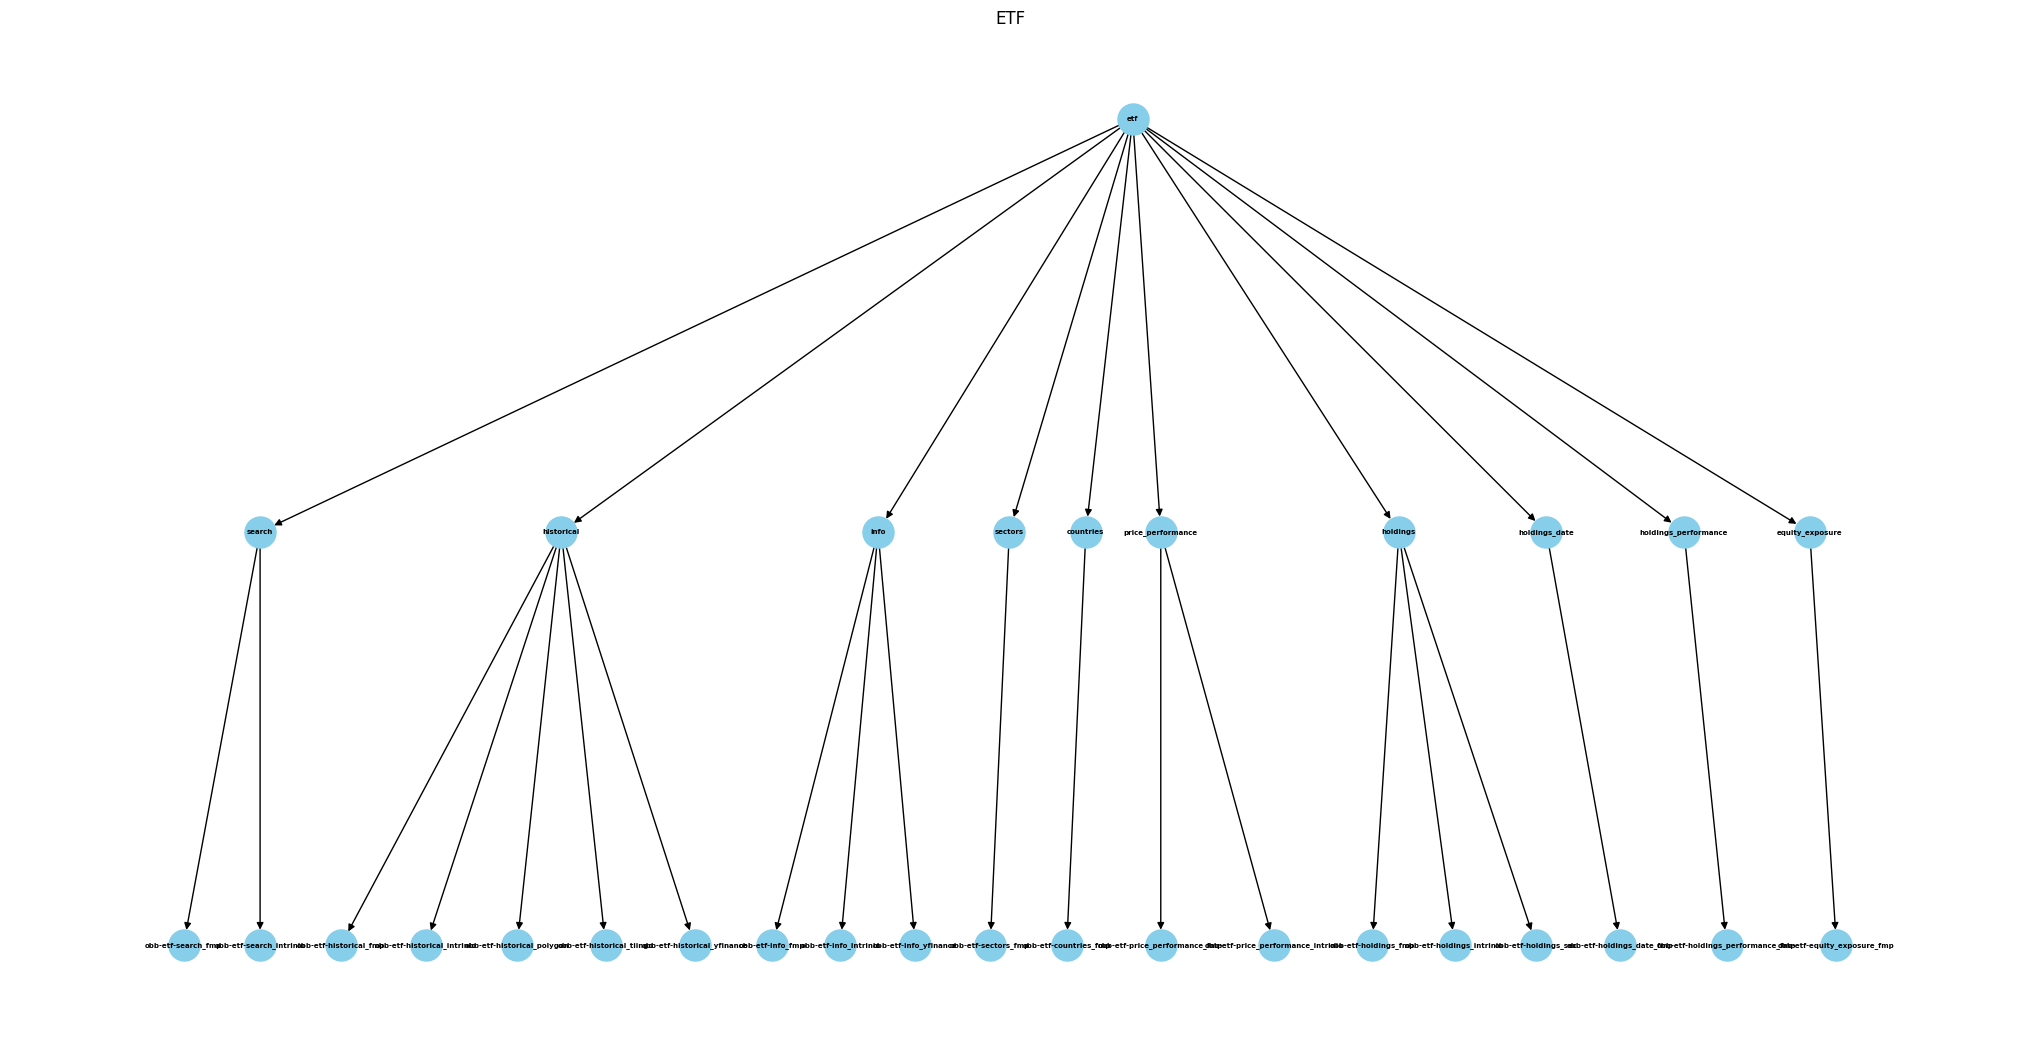

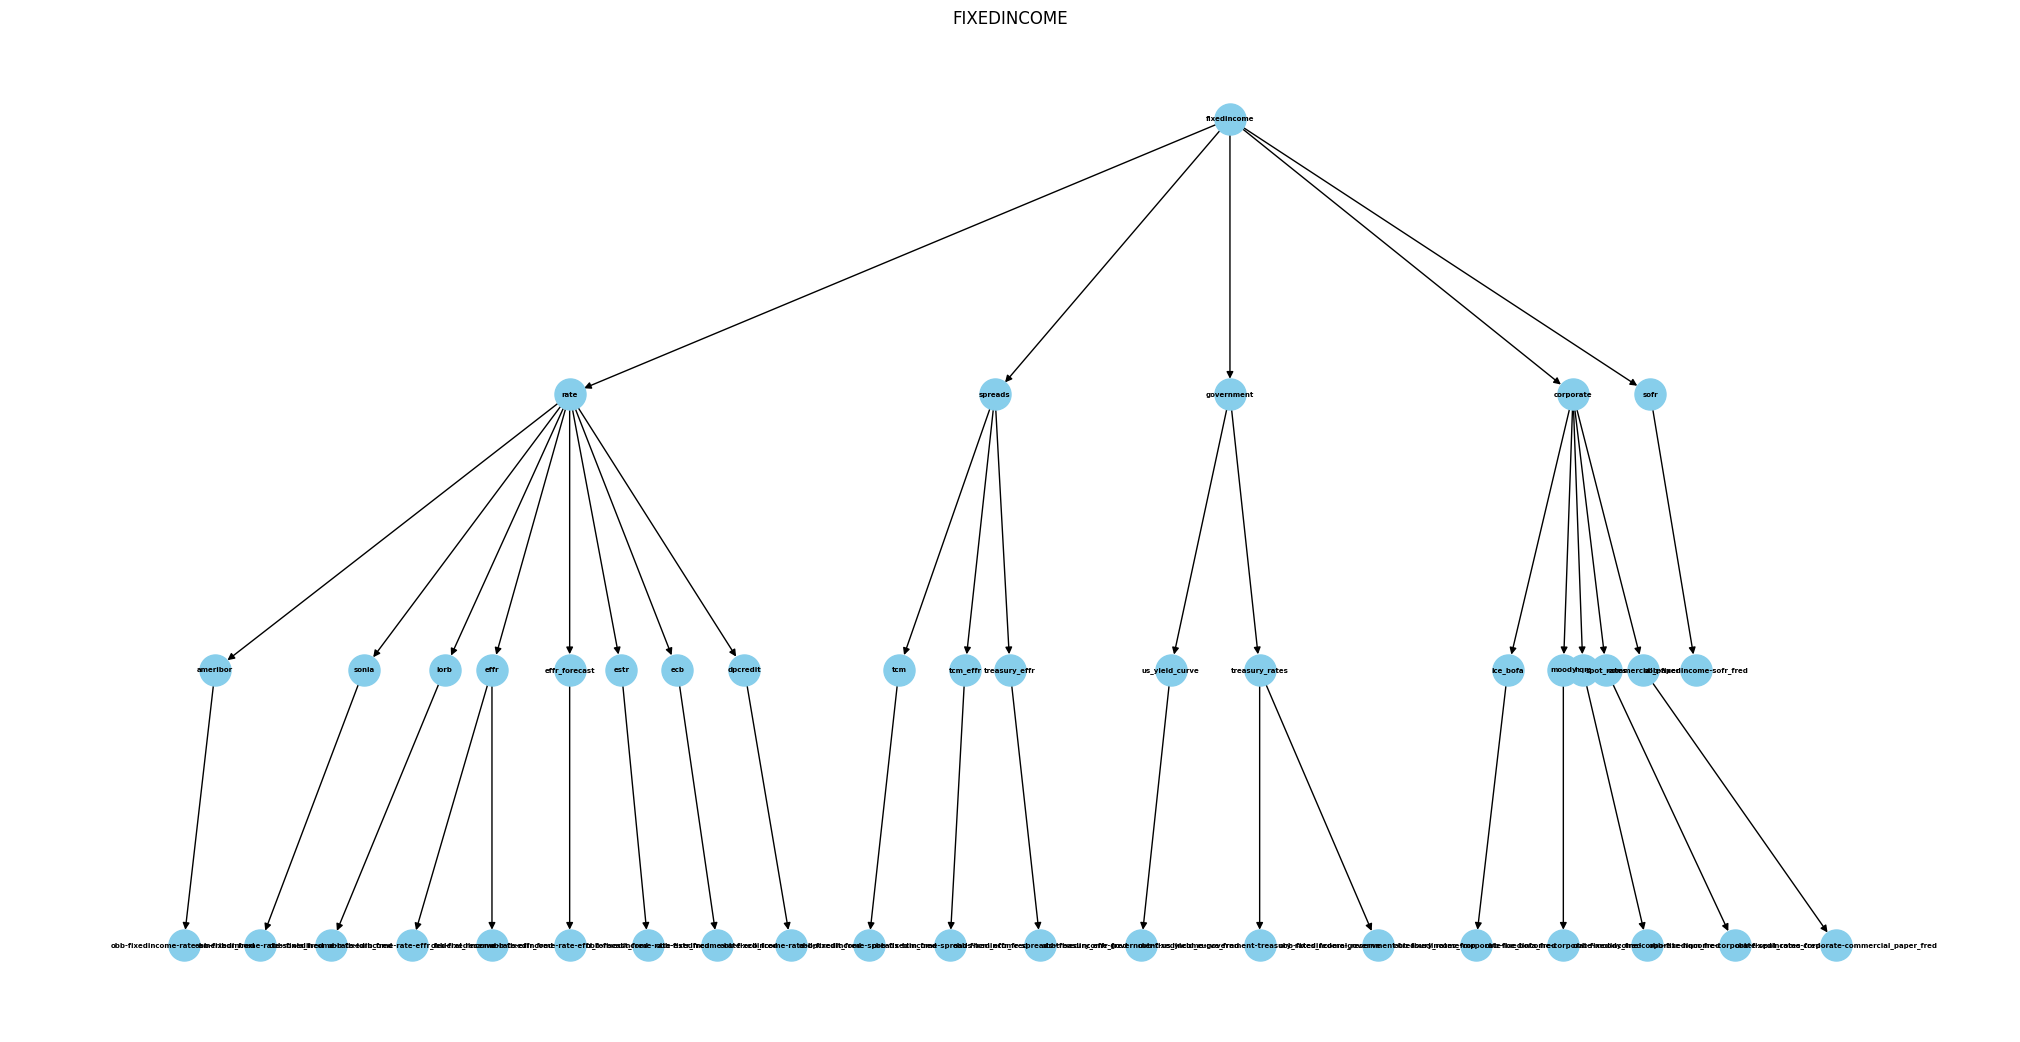

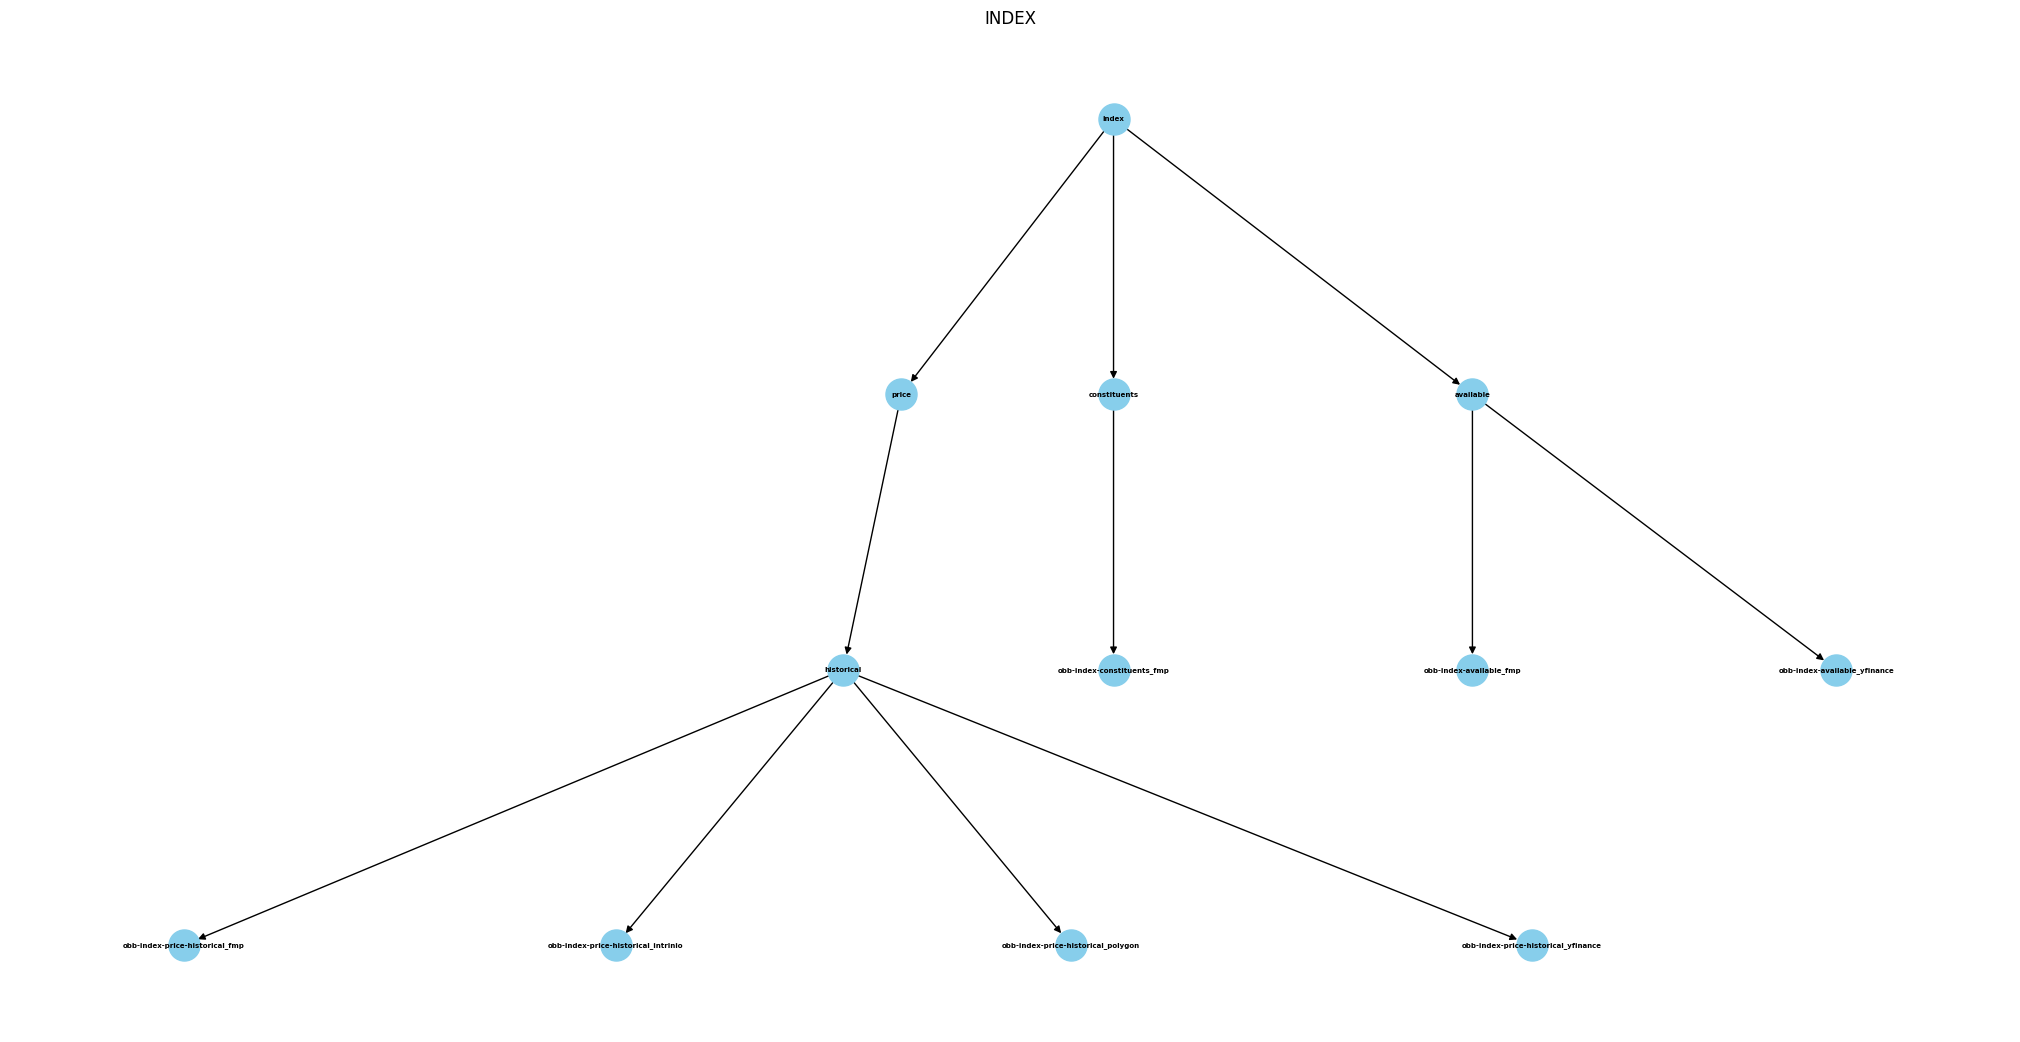

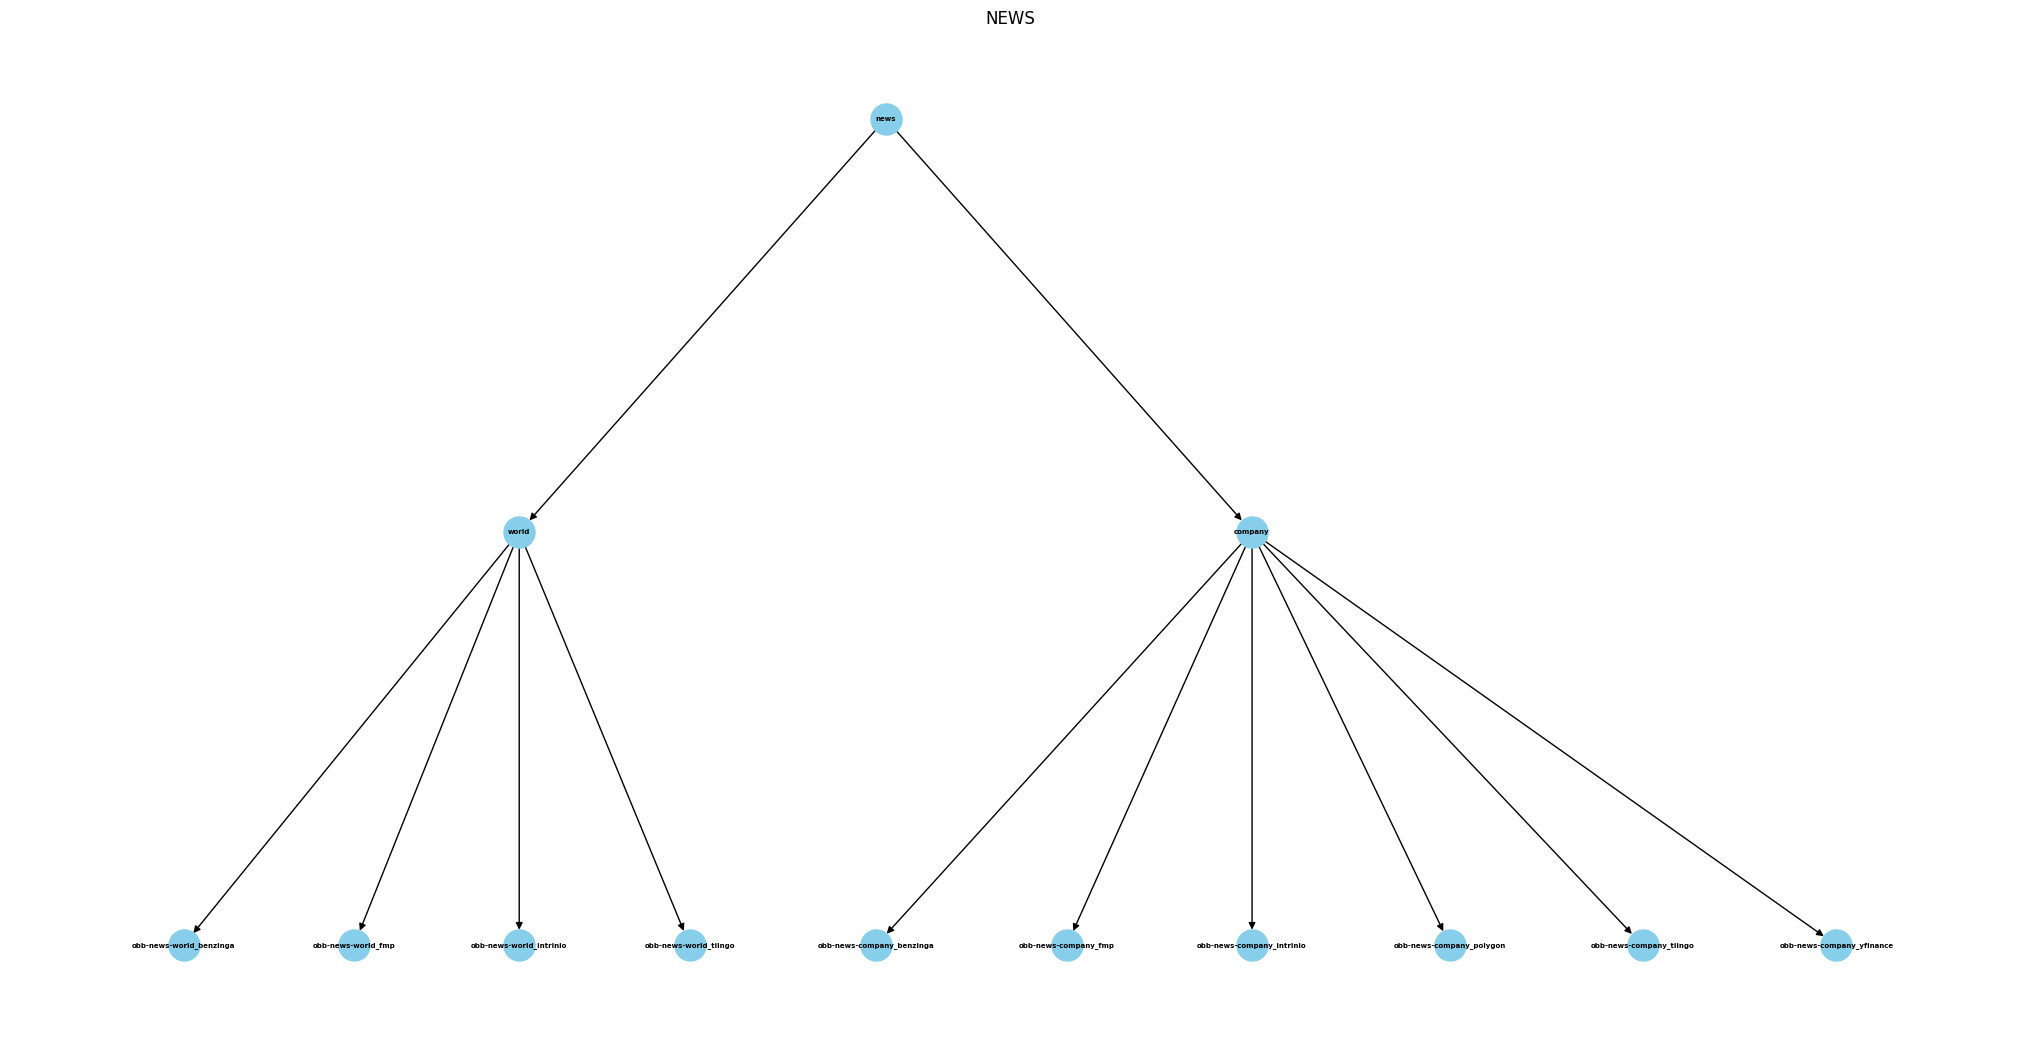

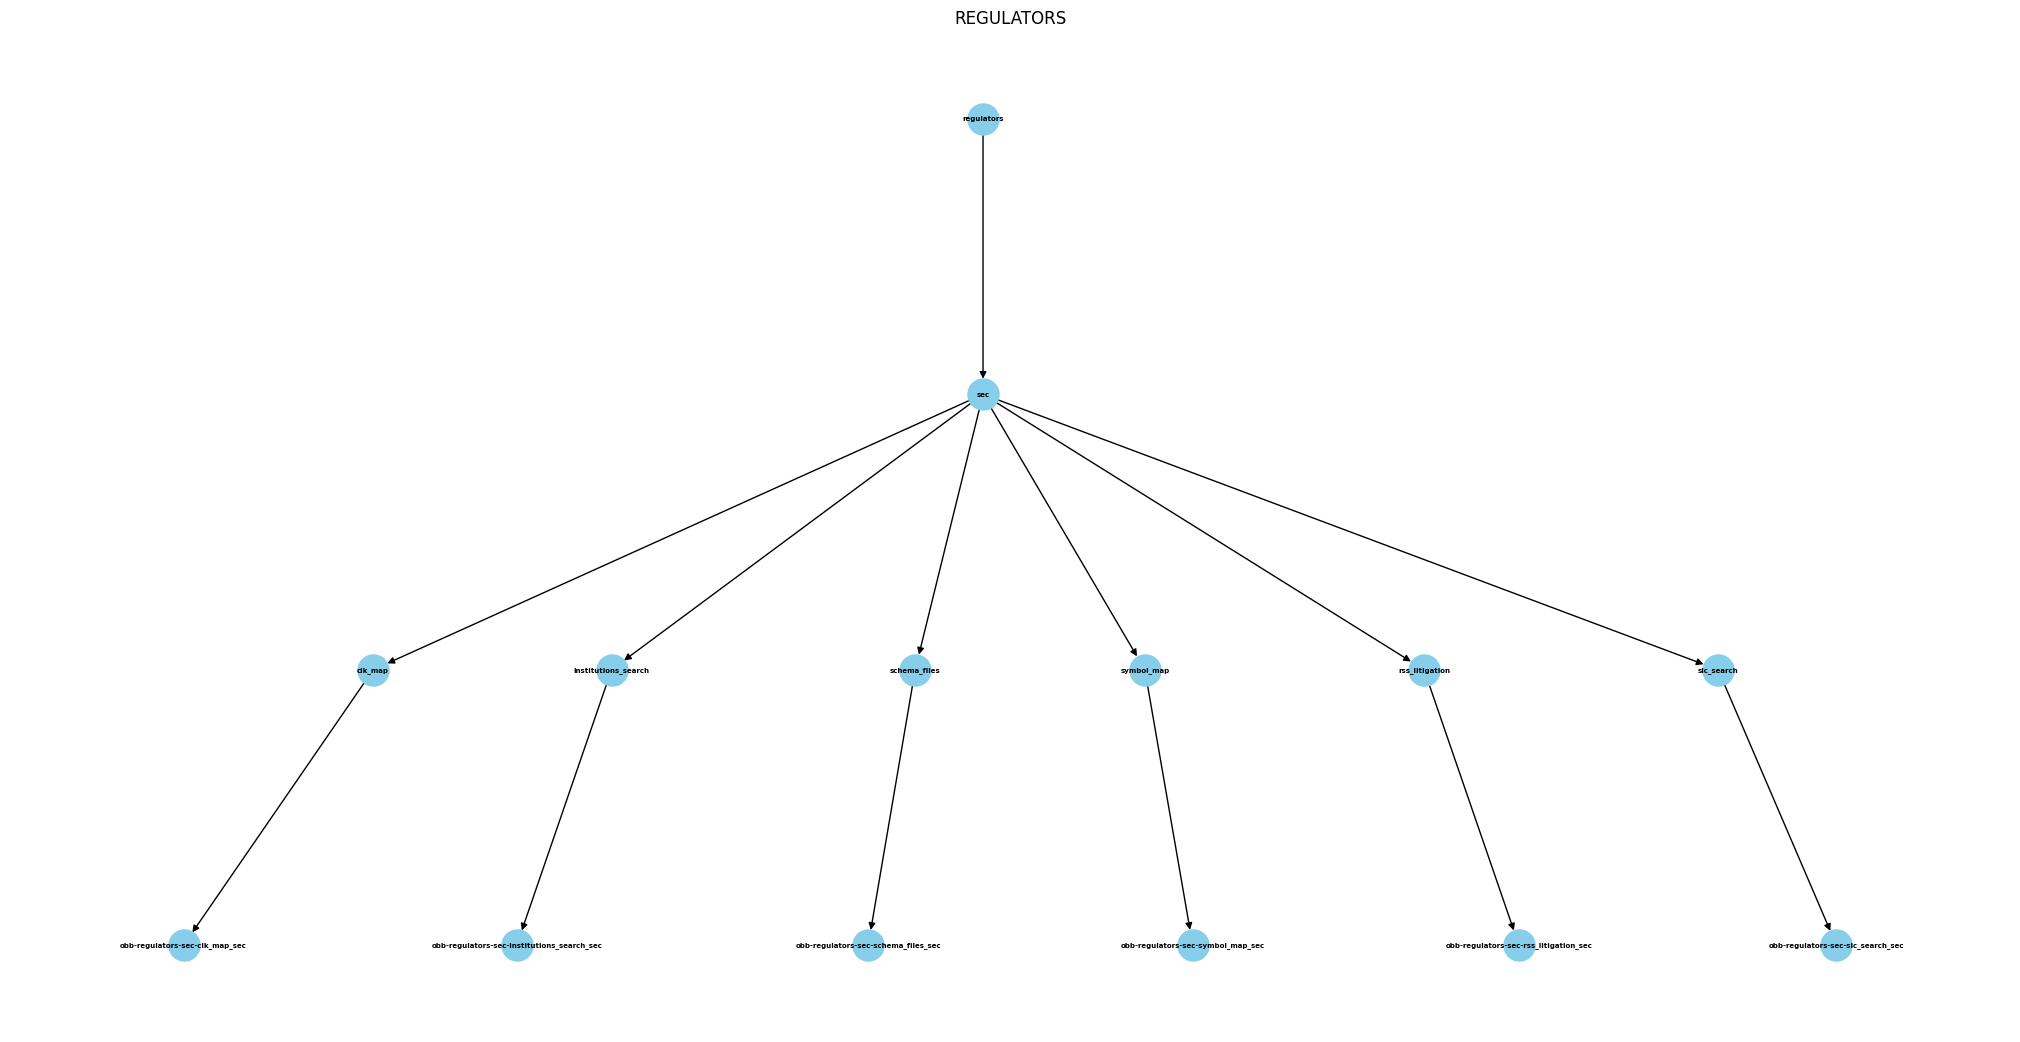

In [6]:
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.pyplot as plt
import networkx as nx

for router in router_names:
    graph = router_names_graph[router]
    pos = graphviz_layout(graph, prog="dot")
    plt.figure(figsize=(20, 10))
    nx.draw(graph, pos, with_labels=True, node_size=500, node_color="skyblue", font_size=5, font_weight="bold", arrows=True)
    plt.title(f"{router.upper()}")
    plt.show()

In [7]:
from agent import build_docs_metadata

docs,metadata = build_docs_metadata(router_names_graph)

In [10]:
len(docs),len(metadata) 

(337, 337)

In [11]:
from agent import build_database, load_database
import os
build_database(docs,metadata,os.environ['OPENAI_API_KEY'])

Collection(name=obb_docsv2)

In [12]:
import os
from agent import load_database
api_key = os.environ['OPENAI_API_KEY']
openbb_collection = load_database(api_key)

In [13]:
openbb_collection.peek()['documents']

['Get historical price data for cryptocurrency pair(s) within a provider. Search available cryptocurrency pairs within a provider. ',
 'Get historical price data for cryptocurrency pair(s) within a provider. ',
 'Get the complete options chain for a ticker. ',
 'ETF Sector weighting. ',
 'ETF Country weighting. ',
 'Price performance as a return, over different periods. ',
 'Get the holdings for an individual ETF. ',
 'Use this function to get the holdings dates, if available. ',
 'Get the recent price performance of each ticker held in the ETF. ',
 'Get the exposure to ETFs for a specific stock. ']

## FUNCTION DISCOVERY PIPELINE

In [14]:
from agent import OpenBBAgentBM25, OpenBBAgentChroma
%load_ext autoreload
%autoreload 2

In [5]:
obb_bm25 = OpenBBAgentBM25(openbb_collection)

functions = obb_bm25("What is the quarter level historical price of Bitcoin from April 2022 to March 2024?")

First level answer: crypto
urrent Trail: ['crypto'] and level: 2
Subsequent level 2 string to LLM: search: Search available cryptocurrency pairs within a provider.


Subsequent level 2 string to LLM: search: Search available cryptocurrency pairs within a provider.

price: Get historical price data for cryptocurrency pair(s) within a provider.


LLM Answer: Prediction(
    rationale='produce the output. We need to find historical price data for a specific cryptocurrency pair within a provider.',
    output='price'
)
urrent Trail: ['crypto-->price'] and level: 3


In [6]:
functions

[[{'function_call': '{\'name\': \'obb_crypto_price_historical_fmp\', \'description\': \'Get historical price data for cryptocurrency pair(s) within a provider. Get it from provider fmp\', \'parameters\': {\'type\': \'object\', \'properties\': {\'symbol\': {\'type\': \'string\', \'description\': \'Symbol to get data for. Can use CURR1-CURR2 or CURR1CURR2 format. Multiple items allowed for provider(s): fmp, polygon, tiingo, yfinance.\', \'default\': \'\'}, \'start_date\': {\'type\': \'string\', \'description\': \'Start date of the data, in YYYY-MM-DD format.\', \'default\': None}, \'end_date\': {\'type\': \'string\', \'description\': \'End date of the data, in YYYY-MM-DD format.\', \'default\': None}, \'provider\': {\'description\': "The provider to use for the query, by default None. If None, the provider specified in defaults is selected or \'fmp\' if there is no default.", \'default\': \'fmp\', \'type\': \'string\', \'enum\': [\'fmp\']}, \'interval\': {\'name\': \'interval\', \'descri

In [17]:
obb_chroma = OpenBBAgentChroma(openbb_collection)

functions,prompts = obb_chroma("What is the quarter level historical price of Bitcoin from April 2022 to March 2024?")

First level string: crypto: Get historical price data for cryptocurrency pair(s) within a provider. Search available cryptocurrency pairs within a provider. 

currency: Currency Historical Price. Currency historical data.  Currency historical prices refer to the past exchange rates of one currency against another over a specific period. This data provides insight into the fluctuations and trends in the foreign exchange market, helping analysts, traders, and economists understand currency performance, evaluate economic health, and make predictions about future movements. Currency Search.  Search available currency pairs. Currency pairs are the national currencies from two countries coupled for trading on the foreign exchange (FX) marketplace. Both currencies will have exchange rates on which the trade will have its position basis. All trading within the forex market, whether selling, buying, or trading, will take place through currency pairs. (ref: Investopedia) Major currency pairs inc

In [7]:
obb_chroma = OpenBBAgentChroma(openbb_collection)

functions = obb_chroma("What is the quarter level historical price of Bitcoin from April 2022 to March 2024?")

First level answer: crypto
Current Trail: ['crypto'] and level: 2
Subsequent level 2 string to LLM: price: Get historical price data for cryptocurrency pair(s) within a provider.

search: Search available cryptocurrency pairs within a provider.


LLM Answer: Prediction(
    rationale='produce the output. We are looking for historical price data for Bitcoin within a specific time frame.',
    output='price'
)
Current Trail: ['crypto-->price'] and level: 3


In [8]:
functions

[{'ids': ['id147', 'id148', 'id149', 'id150'],
  'embeddings': None,
  'metadatas': [{'function_call': '{\'name\': \'obb_crypto_price_historical_fmp\', \'description\': \'Get historical price data for cryptocurrency pair(s) within a provider. Get it from provider fmp\', \'parameters\': {\'type\': \'object\', \'properties\': {\'symbol\': {\'type\': \'string\', \'description\': \'Symbol to get data for. Can use CURR1-CURR2 or CURR1CURR2 format. Multiple items allowed for provider(s): fmp, polygon, tiingo, yfinance.\', \'default\': \'\'}, \'start_date\': {\'type\': \'string\', \'description\': \'Start date of the data, in YYYY-MM-DD format.\', \'default\': None}, \'end_date\': {\'type\': \'string\', \'description\': \'End date of the data, in YYYY-MM-DD format.\', \'default\': None}, \'provider\': {\'description\': "The provider to use for the query, by default None. If None, the provider specified in defaults is selected or \'fmp\' if there is no default.", \'default\': \'fmp\', \'type\'

In [11]:
functions = obb_chroma("What is the company related news of Amazon?")

First level answer: news
Current Trail: ['news'] and level: 2
Subsequent level 2 string to LLM: company: Company News. Get news for one or more companies.

world: World News. Global news data.


LLM Answer: Prediction(
    rationale='produce the output. We need to find the key related to company news for Amazon.',
    output='company'
)
Current Trail: ['news-->company'] and level: 3


In [12]:
functions

[{'ids': ['id324', 'id325', 'id326', 'id327', 'id328', 'id329'],
  'embeddings': None,
  'metadatas': [{'function_call': '{\'name\': \'obb_news_company_benzinga\', \'description\': \'Company News. Get news for one or more companies. Get it from provider benzinga\', \'parameters\': {\'type\': \'object\', \'properties\': {\'symbol\': {\'type\': \'string\', \'description\': \'Symbol to get data for. Multiple items allowed for provider(s): benzinga, fmp, intrinio, polygon, tiingo, yfinance.\', \'default\': None}, \'start_date\': {\'type\': \'string\', \'description\': \'Start date of the data, in YYYY-MM-DD format.\', \'default\': None}, \'end_date\': {\'type\': \'string\', \'description\': \'End date of the data, in YYYY-MM-DD format.\', \'default\': None}, \'limit\': {\'type\': \'integer\', \'description\': \'The number of data entries to return.\', \'default\': 2500}, \'provider\': {\'description\': "The provider to use for the query, by default None. If None, the provider specified in 

In [13]:
from agent import run_function_calling

response = run_function_calling(functions,'yfinance',"What is the historical earnings per share of Amazon?")

/home/athekunal/Function Calling/openbb-env/lib/python3.10/site-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.chat_models.openai.ChatOpenAI` was deprecated in langchain-community 0.0.10 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import ChatOpenAI`.
  warn_deprecated(


In [14]:
response

AIMessage(content='', additional_kwargs={'function_call': {'arguments': '{"symbol":"AMZN","provider":"yfinance"}', 'name': 'obb_news_company'}}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 233, 'total_tokens': 244}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-721da50b-7251-4e8b-ace7-5124d768b8d1-0')

In [15]:
from agent import run_function_calling

question = "What is the historical earnings per share data of Amazon?"

functions = obb_chroma(question)
print(f"Functions: {functions}")

function_response = run_function_calling(functions,'fmp',question)
print("Function Calling response: ",function_response)

First level answer: equity
Current Trail: ['equity'] and level: 2
Subsequent level 2 string to LLM: calendar: Get historical and upcoming initial public offerings (IPOs). Get historical and upcoming dividend payments. Includes dividend amount, ex-dividend and payment dates. Get historical and upcoming stock split operations. Get historical and upcoming company earnings releases. Includes earnings per share (EPS) and revenue data.

fundamental: Get equity valuation multiples for a given company. Get the balance sheet for a given company. Get the growth of a company's balance sheet items over time. Get the cash flow statement for a given company. Get financial statements as reported by the company. Get the growth of a company's cash flow statement items over time. Get historical dividend data for a given company. Get historical earnings per share data for a given company. Get historical employee count data for a given company. Search Intrinio data tags to search in latest or historical a

In [16]:
import ast

obb_func = function_response.additional_kwargs['function_call']
obb_func_name = obb_func['name']
obb_func_name = ".".join(obb_func_name.split("_",2)) + "("
args_dict = ast.literal_eval(obb_func['arguments'])
for arg,val in args_dict.items():
    obb_func_name+=f"{arg}={val},"
obb_func_name = obb_func_name[:-1] + ")"

In [17]:
final_func = "from openbb import obb\n" + obb_func_name
print(final_func)

from openbb import obb
obb.equity.fundamental_historical_eps(symbol=AMZN,provider=fmp)


In [11]:
from agent import run_function_calling, format_function
from agent import OpenBBAgentBM25, OpenBBAgentChroma
%load_ext autoreload
%autoreload 2
obb_chroma = OpenBBAgentChroma(openbb_collection)
def main(question:str,provider:str):
    functions = obb_chroma(question)
    print(f"Functions: {functions}")

    function_response = run_function_calling(functions,provider,question)
    print("Function Calling response: ",function_response)
    return format_function(function_response)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
func = main("I want historical future 30 minutes level prices for ES and NQ ",provider='yfinance')
func

First level answer: derivatives
Current Trail: ['derivatives'] and level: 2
Subsequent level 2 string to LLM: futures: Historical futures prices. Futures Term Structure, current or historical.

options: Get the complete options chain for a ticker.


LLM Answer: Prediction(
    rationale='produce the output. We need to find historical future prices for a specific time frame and specific tickers.',
    output='futures'
)
Current Trail: ['derivatives-->futures'] and level: 3
Subsequent level 3 string to LLM: historical: Historical futures prices.

curve: Futures Term Structure, current or historical.


LLM Answer: Prediction(
    rationale='produce the output. We need to find the key that is most relevant to the query, which is requesting historical future 30 minutes level prices for ES and NQ.',
    output='historical'
)
Current Trail: ['derivatives-->futures-->historical'] and level: 4
Functions: [{'ids': ['id162'], 'embeddings': None, 'metadatas': [{'function_call': '{\'name\': \'obb_d

'from openbb import obb\nobb.derivatives.futures_historical(symbol=ES NQ,provider=yfinance,interval=30m)'

In [ ]:
func = main("What is the historical earnings per share data of Amazon?",provider='fmp')
func

In [20]:
func = main("I want to find all the stock splits for the year 2023",provider='fmp')
func

First level answer: equity
Current Trail: ['equity'] and level: 2
Subsequent level 2 string to LLM: calendar: Get historical and upcoming initial public offerings (IPOs). Get historical and upcoming dividend payments. Includes dividend amount, ex-dividend and payment dates. Get historical and upcoming stock split operations. Get historical and upcoming company earnings releases. Includes earnings per share (EPS) and revenue data.

discovery: Get the top price gainers in the stock market. Get the top price losers in the stock market. Get the most actively traded stocks based on volume. Get potentially undervalued large cap stocks. Get potentially undervalued growth stocks. Get top small cap stocks based on earnings growth. Get top tech stocks based on revenue and earnings growth. Get the URLs to SEC filings reported to EDGAR database, such as 10-K, 10-Q, 8-K, and more.SEC filings include Form 10-K, Form 10-Q, Form 8-K, the proxy statement, Forms 3, 4, and 5, Schedule 13, Form 114,Foreig

'from openbb import obb\nobb.equity.fundamental_historical_splits(symbol=AAPL,provider=fmp)'

In [12]:
func = main("I want the fixed income European Central Bank Interest Rates based on the refinancing interest rate type",provider='fmp')
func

First level answer: fixedincome
Current Trail: ['fixedincome'] and level: 2
Subsequent level 2 string to LLM: rate: Ameribor.Ameribor (short for the American interbank offered rate) is a benchmark interest rate that reflects the true cost ofshort-term interbank borrowing. This rate is based on transactions in overnight unsecured loans conducted on theAmerican Financial Exchange (AFX). Sterling Overnight Index Average.SONIA (Sterling Overnight Index Average) is an important interest rate benchmark. SONIA is based on actualtransactions and reflects the average of the interest rates that banks pay to borrow sterling overnight from otherfinancial institutions and other institutional investors. Interest on Reserve Balances.Get Interest Rate on Reserve Balances data A bank rate is the interest rate a nation's central bank charges to itsdomestic banks to borrow money. The rates central banks charge are set to stabilize the economy. In theUnited States, the Federal Reserve System's Board of Go

/home/athekunal/Function Calling/openbb-env/lib/python3.10/site-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.chat_models.openai.ChatOpenAI` was deprecated in langchain-community 0.0.10 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import ChatOpenAI`.
  warn_deprecated(


UnboundLocalError: local variable 'function_call' referenced before assignment

In [23]:
func = main("Give me the forecasted nominal gdp data for bulgaria",provider='oecd')
print(func)

First level answer: economy
Current Trail: ['economy'] and level: 2
Subsequent level 2 string to LLM: gdp: Get Forecasted GDP Data. Get Nominal GDP Data. Get Real GDP Data.

unemployment: Get global unemployment data.

calendar: Get the upcoming, or historical, economic calendar of global events.

risk_premium: Get Market Risk Premium by country.

money_measures: Get Money Measures (M1/M2 and components).The Federal Reserve publishes as part of the H.6 Release.


LLM Answer: Prediction(
    rationale='produce the output. We need to find the key that provides forecasted nominal GDP data for a specific country.',
    output='gdp'
)
Current Trail: ['economy-->gdp'] and level: 3
Subsequent level 3 string to LLM: forecast: Get Forecasted GDP Data.

nominal: Get Nominal GDP Data.

real: Get Real GDP Data.


LLM Answer: Prediction(
    rationale='produce the output. We need to find the forecasted nominal GDP data for Bulgaria.',
    output='forecast; nominal'
)
Current Trail: ['economy-->gdp-

In [28]:
func = main("I want the FRED regional data for NYICLAIMS for the year 2021 and limit the results to 10",provider='fred')
print(func)

First level answer: economy; limit
Current Trail: ['economy', 'limit'] and level: 2
Subsequent level 2 string to LLM: fred_regional: Query the Geo Fred API for regional economic data by series group.The series group ID is found by using `fred_search` and the `series_id` parameter.

fred_series: Get data by series ID from FRED.

fred_search: Search for FRED series or economic releases by ID or string.This does not return the observation values, only the metadata.Use this function to find series IDs for `fred_series()`.

unemployment: Get global unemployment data.

gdp: Get Forecasted GDP Data.


LLM Answer: Prediction(
    rationale='produce the output. We need to query the FRED regional data for NYICLAIMS for the year 2021 and limit the results to 10. This involves searching for a specific series ID related to NYICLAIMS regional data for the year 2021.',
    output='fred_search; fred_series; fred_regional'
)
Current Trail: ['economy-->fred_search', 'economy-->fred_regional', 'economy--

In [13]:
func = main("I want to find the upcoming dividend payments",provider='fmp')
print(func)

First level answer: equity
Current Trail: ['equity'] and level: 2
Subsequent level 2 string to LLM: calendar: Get historical and upcoming initial public offerings (IPOs). Get historical and upcoming dividend payments. Includes dividend amount, ex-dividend and payment dates. Get historical and upcoming stock split operations. Get historical and upcoming company earnings releases. Includes earnings per share (EPS) and revenue data.

fundamental: Get equity valuation multiples for a given company. Get the balance sheet for a given company. Get the growth of a company's balance sheet items over time. Get the cash flow statement for a given company. Get financial statements as reported by the company. Get the growth of a company's cash flow statement items over time. Get historical dividend data for a given company. Get historical earnings per share data for a given company. Get historical employee count data for a given company. Search Intrinio data tags to search in latest or historical a

ValueError: malformed node or string on line 1: <ast.Name object at 0x7f72f02a7be0>

In [7]:
func = main("I want the closest peer for Microsoft",provider='fmp')
print(func)

First level answer: equity
Current Trail: ['equity'] and level: 2
Subsequent level 2 string to LLM: compare: Get the closest peers for a given company.Peers consist of companies trading on the same exchange, operating within the same sectorand with comparable market capitalizations.

calendar: Get historical and upcoming initial public offerings (IPOs).

estimates: Get analyst price targets by company.

market_snapshots: Get an updated equity market snapshot. This includes price data for thousands of stocks.

fundamental: Get equity valuation multiples for a given company.


LLM Answer: Prediction(
    rationale='produce the output. We are looking for the closest peers for a given company, which falls under the "compare" category.',
    output='compare'
)
Current Trail: ['equity-->compare'] and level: 3
Functions: [{'ids': ['id184'], 'embeddings': None, 'metadatas': [{'function_call': '{\'name\': \'obb_equity_compare_peers_fmp\', \'description\': \'Get the closest peers for a given com

In [9]:
func = main("I want undervalued growth stocks from yahoo finance sorted by ascending order",provider='fmp')
print(func)

First level answer: equity
Current Trail: ['equity'] and level: 2
Subsequent level 2 string to LLM: discovery: Get the top price gainers in the stock market.

fundamental: Get equity valuation multiples for a given company.

estimates: Get analyst price targets by company.

screener: Screen for companies meeting various criteria.These criteria include market cap, price, beta, volume, and dividend yield.

calendar: Get historical and upcoming initial public offerings (IPOs).


LLM Answer: Prediction(
    rationale='produce the output. We need to find undervalued growth stocks, so we are looking for companies with potential for growth that are currently trading at a lower value than their potential. We also need to sort them by ascending order, meaning we want to see the stocks with the lowest valuation first.',
    output='screener'
)
Current Trail: ['equity-->screener'] and level: 3
Functions: [{'ids': ['id265'], 'embeddings': None, 'metadatas': [{'function_call': '{\'name\': \'obb_equ

BadRequestError: Error code: 400 - {'error': {'message': "Invalid schema for function 'obb_equity_screener': 'float' is not valid under any of the given schemas.", 'type': 'invalid_request_error', 'param': 'functions[0].parameters', 'code': 'invalid_function_parameters'}}

In [24]:
func = main("I want the equity valuation multiples for Apple (AAPL)",provider='fmp')
print(func)

First level answer: equity
Current Trail: ['equity'] and level: 2
Subsequent level 2 string to LLM: fundamental: Get equity valuation multiples for a given company. Get the balance sheet for a given company. Get the growth of a company's balance sheet items over time. Get the cash flow statement for a given company. Get financial statements as reported by the company. Get the growth of a company's cash flow statement items over time. Get historical dividend data for a given company. Get historical earnings per share data for a given company. Get historical employee count data for a given company. Search Intrinio data tags to search in latest or historical attributes. Get the latest value of a data tag from Intrinio. Get the historical values of a data tag from Intrinio. Get the income statement for a given company. Get the growth of a company's income statement items over time. Get fundamental metrics for a given company. Get executive management team data for a given company. Get exec

In [14]:
func = main("I want spot rates with maturity 10, 20, 30 and 50 years from fred provider",provider='fmp')
print(func)

First level answer: fixedincome
Current Trail: ['fixedincome'] and level: 2
Subsequent level 2 string to LLM: rate: Ameribor.Ameribor (short for the American interbank offered rate) is a benchmark interest rate that reflects the true cost ofshort-term interbank borrowing. This rate is based on transactions in overnight unsecured loans conducted on theAmerican Financial Exchange (AFX). Sterling Overnight Index Average.SONIA (Sterling Overnight Index Average) is an important interest rate benchmark. SONIA is based on actualtransactions and reflects the average of the interest rates that banks pay to borrow sterling overnight from otherfinancial institutions and other institutional investors. Interest on Reserve Balances.Get Interest Rate on Reserve Balances data A bank rate is the interest rate a nation's central bank charges to itsdomestic banks to borrow money. The rates central banks charge are set to stabilize the economy. In theUnited States, the Federal Reserve System's Board of Go

UnboundLocalError: local variable 'function_call' referenced before assignment